In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Salary_data_cleaned.csv')

In [11]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,Job State,same_state,Company_age,python_dep,R,spark,Excel,job_simp,Seniority
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,NM,0,49,1,0,0,1,data scientist,na
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,MD,0,38,1,0,0,0,data scientist,na
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,FL,1,12,1,0,1,1,data scientist,na
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,WA,1,57,1,0,0,0,data scientist,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,NY,1,24,1,0,0,1,data scientist,na


In [9]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided salary', 'min_salary', 'max_salary',
       'avg_salary', 'Job State', 'same_state', 'Company_age', 'python_dep',
       'R', 'spark', 'Excel'],
      dtype='object')

In [24]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr' in title.lower():
        return 'jr'
    else:
        return 'na'

## job title and seniority
## fix state Los Angeles
## Job description length
## Competitor count
## hourly wage to annual

In [5]:
df['job_simp']= df['Job Title'].apply(title_simplifier)

In [8]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [6]:
df['Seniority']= df['Job Title'].apply(seniority)

In [8]:
df.Seniority.value_counts()

na        647
senior     93
jr          2
Name: Seniority, dtype: int64

In [7]:
#fixing state Los Angeles
df['Job State'] = df['Job State'].apply(lambda x: x.strip() if x.strip().lower()!= 'los angeles' else 'LA' )

In [8]:
df['Job State'].value_counts()

CA    151
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
LA      5
CT      5
IA      5
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: Job State, dtype: int64

In [9]:
#Job Description length
df['disc_len']= df['Job Description'].apply(lambda x: len(x))

In [13]:
df['min_salary']= df.apply(lambda x: x.min_salary*2 if x.hourly==1 else x.min_salary, axis =1)

In [14]:
df['max_salary']= df.apply(lambda x: x.max_salary*2 if x.hourly==1 else x.max_salary, axis =1)

In [18]:
df[df.hourly==1][['hourly','min_salary','max_salary']] #hourly wage to annual

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [25]:
df.describe()

,Rating,Founded,hourly,employer provided salary,min_salary,max_salary,avg_salary,same_state,Company_age,python_dep,R,spark,Excel,disc_len
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,48.456873,0.528302,0.001348,0.225067,0.522911,3869.545822
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.900445,0.499535,0.036711,0.417908,0.499812,1521.495868
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,407.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,2801.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,26.000000,1.000000,0.000000,0.000000,1.000000,3731.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,61.000000,1.000000,0.000000,0.000000,1.000000,4740.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,278.000000,1.000000,1.000000,1.000000,1.000000,10051.000000


<AxesSubplot:>

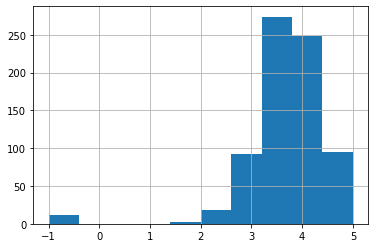

In [26]:
df.Rating.hist()

<AxesSubplot:>

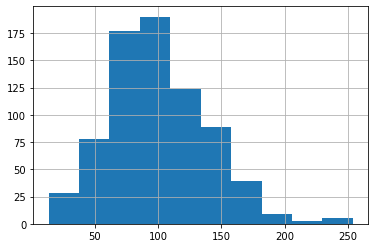

In [27]:
df.avg_salary.hist()

<AxesSubplot:>

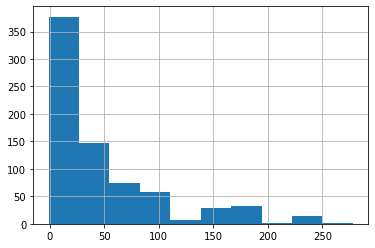

In [30]:
df.Company_age.hist()

<AxesSubplot:>

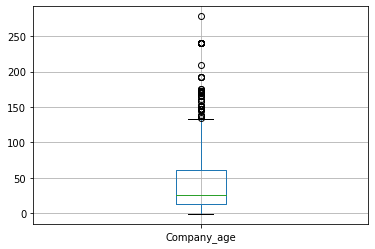

In [32]:
df.boxplot(column ='Company_age')

In [34]:
df[['Company_age', 'avg_salary', 'Rating', 'disc_len']].corr()

,Company_age,avg_salary,Rating,disc_len
Company_age,1.000000,0.019492,0.024665,0.164461
avg_salary,0.019492,1.000000,0.013492,0.078808
Rating,0.024665,0.013492,1.000000,-0.012281
disc_len,0.164461,0.078808,-0.012281,1.000000


<AxesSubplot:>

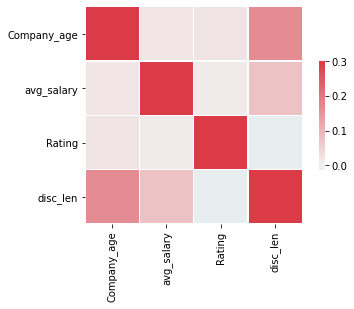

In [36]:
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(df[['Company_age', 'avg_salary','Rating', 'disc_len']].corr(), vmax=.3, center=0, cmap=cmap, square=True,
           linewidths=.5, cbar_kws = {"shrink":.5})

In [39]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided salary', 'min_salary', 'max_salary',
       'avg_salary', 'Job State', 'same_state', 'Company_age', 'python_dep',
       'R', 'spark', 'Excel', 'job_simp', 'Seniority', 'disc_len'],
      dtype='object')

In [40]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Job State', 'R', 'spark', 'Excel', 'job_simp', 'Seniority' ]]

graph for Location: total = 200


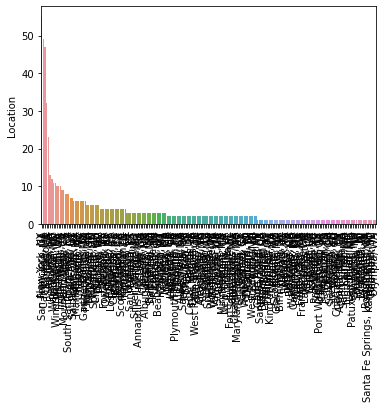

graph for Headquarters: total = 198


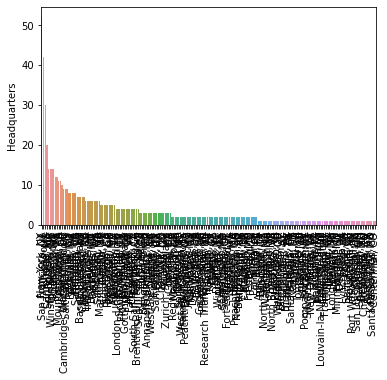

graph for Size: total = 9


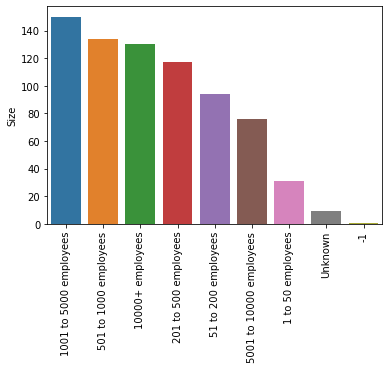

graph for Type of ownership: total = 11


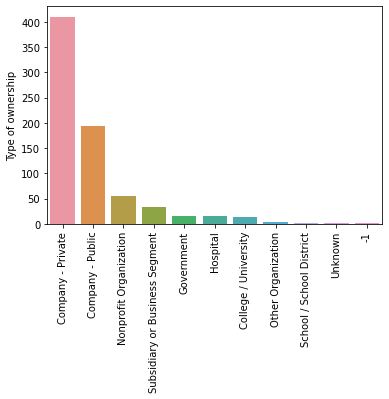

graph for Industry: total = 60


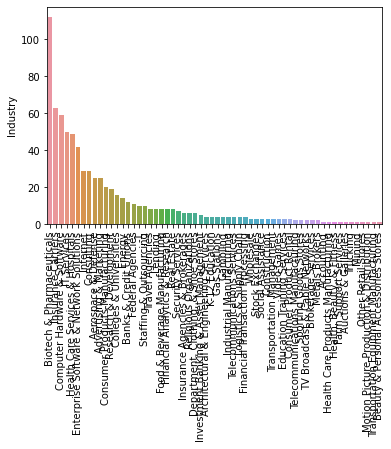

graph for Sector: total = 25


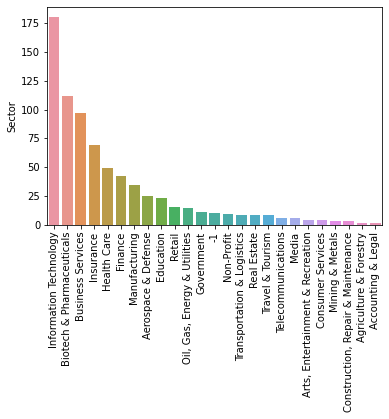

graph for Revenue: total = 14


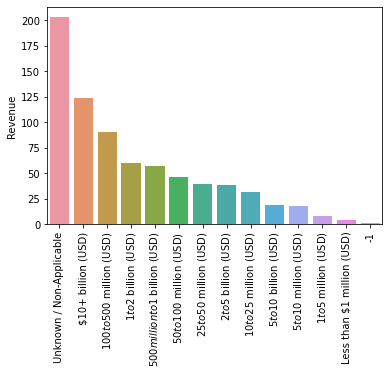

graph for Job State: total = 37


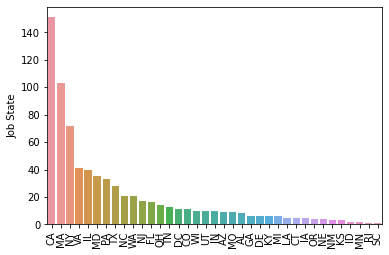

graph for R: total = 2


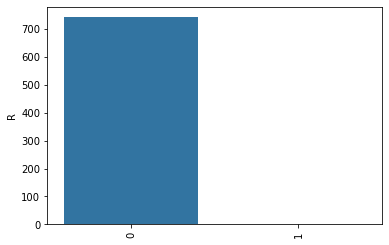

graph for spark: total = 2


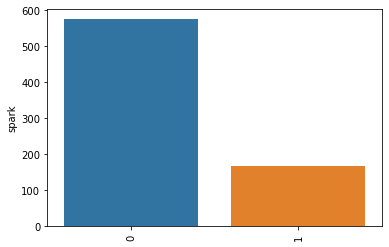

graph for Excel: total = 2


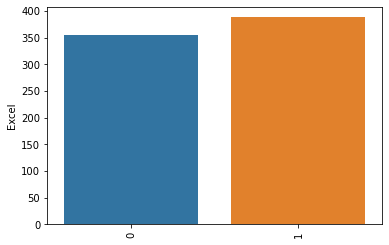

graph for job_simp: total = 7


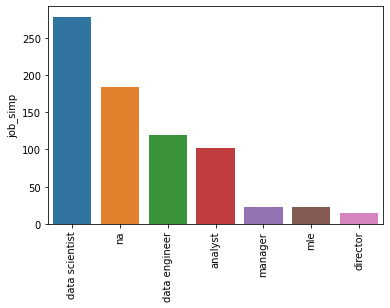

graph for Seniority: total = 3


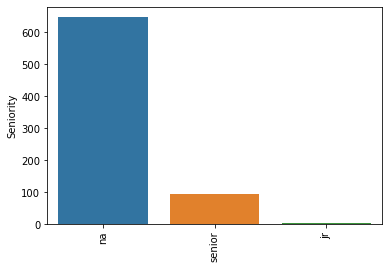

In [41]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

graph for Location: total = 20


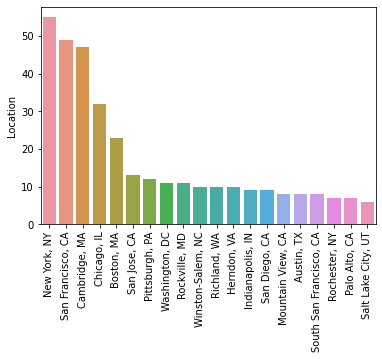

graph for Headquarters: total = 20


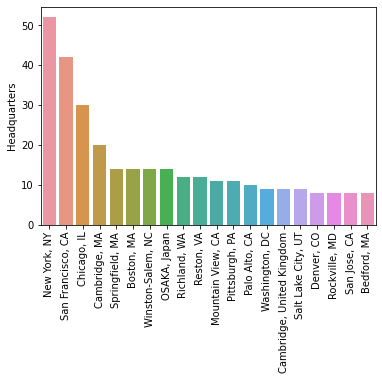

graph for Industry: total = 20


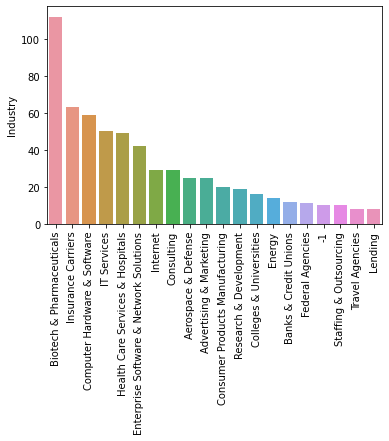

In [45]:
for i in df_cat[['Location', 'Headquarters','Industry']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

In [48]:
pd.pivot_table(df, index = 'job_simp', values= 'avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [50]:
pd.pivot_table(df, index = ['job_simp','Seniority'], values= 'avg_salary')

avg_salary
job_simp       Seniority            
analyst        jr          56.500000
               na          65.467742
               senior      71.562500
data engineer  na         100.380208
               senior     126.369565
data scientist jr         106.500000
               na         112.927126
               senior     154.870968
director       na         168.607143
manager        na          84.022727
mle            na         121.380952
               senior     232.500000
na             na          80.314935
               senior     108.150000

In [52]:
pd.pivot_table(df, index = 'Job State', values= 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
Job State,
CA,123.619205
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [64]:
pd.set_option('display.max_rows', None)
pd.pivot_table(df[df.job_simp=='data scientist'],index='Job State', values= 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
Job State,
DC,149.000000
CA,143.044776
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [65]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided salary', 'min_salary', 'max_salary',
       'avg_salary', 'Job State', 'same_state', 'Company_age', 'python_dep',
       'R', 'spark', 'Excel', 'job_simp', 'Seniority', 'disc_len'],
      dtype='object')

In [68]:
df_pivots = df[['Rating','Industry', 'Sector', 'Revenue', 'hourly', 'employer provided salary','python_dep','R', 'spark', 'Excel', 'Type of ownership', 'avg_salary']]

In [74]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values='avg_salary').sort_values('avg_salary', ascending=False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional